In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing Dataset

df = pd.read_csv("Healthcare data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dt = df.dtypes.value_counts()
dt

int64      7
float64    2
dtype: int64

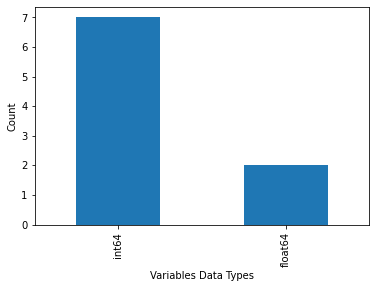

In [6]:
fig, ax = plt.subplots()
dt.plot(ax=ax, kind='bar', xlabel='Variables Data Types', ylabel='Count')
plt.show()

### Descriptive Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Grouping labels with target variable

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Missing Values Analysis

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df['Glucose'].value_counts()[0]

5

In [11]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())

In [13]:
print(df['Glucose'].mean())

121.68160502115886


In [14]:
#df['Glucose'] = df['Glucose'].replace(0,np.nan)
#df['Glucose'].isna().sum()
#df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())

In [15]:
df.iloc[182]

Pregnancies                   1.000000
Glucose                     120.894531
BloodPressure                74.000000
SkinThickness                20.000000
Insulin                      23.000000
BMI                          27.700000
DiabetesPedigreeFunction      0.299000
Age                          21.000000
Outcome                       0.000000
Name: 182, dtype: float64

In [16]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean() )

In [17]:
print(df['BloodPressure'].mean())

72.25480651855469


In [18]:
df['SkinThickness'].value_counts()[0]

227

In [19]:
print(df['SkinThickness'].median())

23.0


In [20]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())

In [21]:
print(df['BMI'].median())

32.0


In [22]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [23]:
print(df['Insulin'].median())

30.5


In [24]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [26]:
df.to_csv('HealthCare_New_Data.csv')

## Count Frequency plot 

In [27]:
#df.apply(lambda x: x.value_counts()).T.stack()

In [107]:
#df['Glucose'].value_counts().head()

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

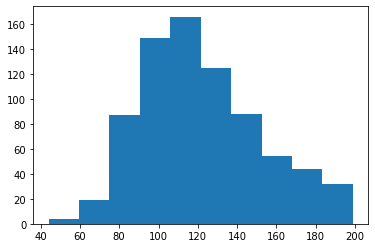

In [29]:
#df.apply(lambda x: x.value_counts()).T.stack()
plt.hist(x = "Glucose",data = df)

In [108]:
#df['BloodPressure'].value_counts().head()

In [31]:
#sns.countplot(x='BloodPressure', data = df)

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

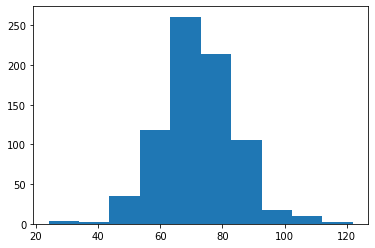

In [32]:
plt.hist(df['BloodPressure'])

In [109]:
#df['SkinThickness'].value_counts().head()

(array([ 59., 368., 181., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

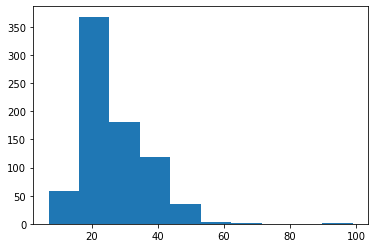

In [34]:
plt.hist(df['SkinThickness'])

In [110]:
#df['Insulin'].value_counts().head()

(array([516., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

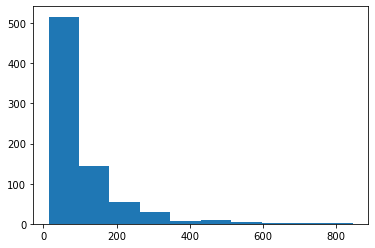

In [36]:
plt.hist(df['Insulin'])

In [111]:
#df['BMI'].value_counts().head()

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

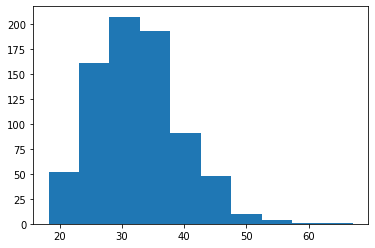

In [38]:
plt.hist(df['BMI'])

(array([ 17.,  35.,  77.,  84.,  97., 110., 113.,  80.,  61.,  30.,  29.,
         19.,   7.,   3.,   2.,   2.,   1.,   0.,   0.,   1.]),
 array([18.2  , 20.645, 23.09 , 25.535, 27.98 , 30.425, 32.87 , 35.315,
        37.76 , 40.205, 42.65 , 45.095, 47.54 , 49.985, 52.43 , 54.875,
        57.32 , 59.765, 62.21 , 64.655, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x15b2c8c9fd0>])

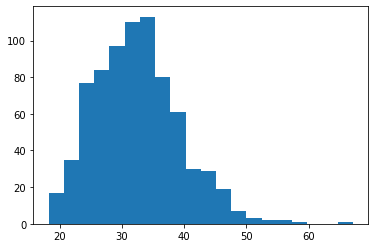

In [39]:
plt.hist(df['BMI'],histtype='stepfilled',bins=20)

In [40]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

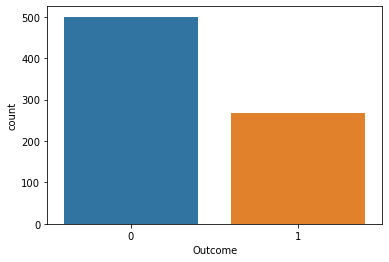

In [41]:
sns.countplot(x='Outcome', data=df)

In [42]:
# Balancing Imbalanced data in the datset

#from imblearn.over_sampling import SMOTE
#sm = SMOTE(sampling_strategy='minority')
#df_without_target_over,df_with_target_over = sm.fit_resample(df[df.columns[df.columns!='Outcome']], df[df.columns[df.columns=='Outcome']])
#df_with_target_over.value_counts()


In [43]:
#sns.set_style('darkgrid')
#sns.countplot(x='Outcome', data=df_with_target_over)

# Scatter Plot

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

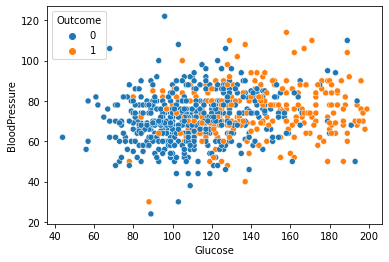

In [44]:
sns.scatterplot(x='Glucose', y = 'BloodPressure', hue= 'Outcome', data = df)

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

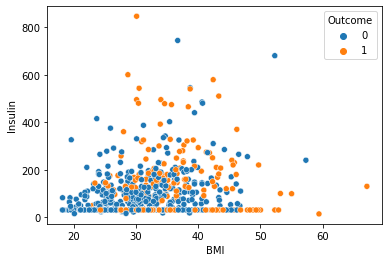

In [45]:
sns.scatterplot(x='BMI', y = 'Insulin', hue= 'Outcome', data = df)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

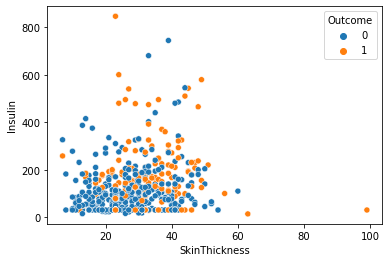

In [46]:
sns.scatterplot(x='SkinThickness', y = 'Insulin', hue= 'Outcome', data = df)

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

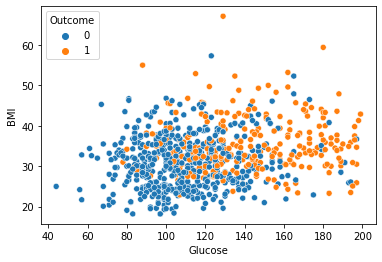

In [47]:
sns.scatterplot(x='Glucose', y = 'BMI', hue= 'Outcome', data = df)

##  Perform correlation analysis (Heatmap)

In [48]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

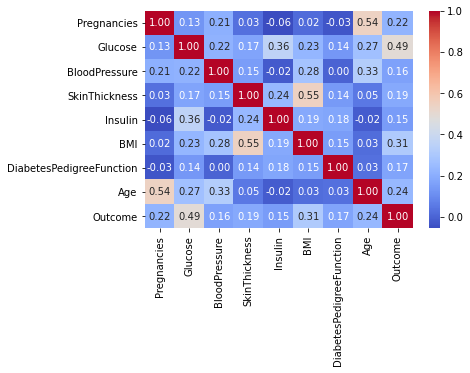

In [49]:
#plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## Data Modeling

# Building Classification Models

In [50]:
X= df.drop('Outcome', axis =1) # features
y = df['Outcome']              # labels

In [51]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


### Training the Model

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [54]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [55]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35,30.5,33.6,0.627,50
172,2,87.0,69.105469,23,30.5,28.9,0.773,25
596,0,67.0,76.000000,23,30.5,45.3,0.194,46
231,6,134.0,80.000000,37,370.0,46.2,0.238,46
41,7,133.0,84.000000,23,30.5,40.2,0.696,37


In [56]:
# building logistic model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [57]:
# fitting the model
model_lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
# predicting the model
y_pred_lr = model_lr.predict(X_test)

In [59]:
# importing metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score : \n", accuracy_score(y_test,y_pred_lr))

Accuracy score : 
 0.7727272727272727


In [60]:
print("Confusion Matrix : \n", confusion_matrix(y_test,y_pred_lr))

Confusion Matrix : 
 [[86 15]
 [20 33]]


In [61]:
print("Classsification report : \n",classification_report(y_test, y_pred_lr))

Classsification report : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       101
           1       0.69      0.62      0.65        53

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



## Implementing Logistic Regression with SMOTE

In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))  

Before OverSampling, counts of label '1': 215
Before OverSampling, counts of label '0': 399 



In [63]:
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (798, 8)
After OverSampling, the shape of train_y: (798,) 

After OverSampling, counts of label '1': 399
After OverSampling, counts of label '0': 399


### Fitting the Logistic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train_res, y_train_res)

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
print(model.score(X_test,y_test))

0.7922077922077922


In [69]:
#print(model.predict_proba(X_test))

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.7922077922077922


In [72]:
print("Confusion Matrix : \n", confusion_matrix(y_test,y_pred))

Confusion Matrix : 
 [[79 22]
 [10 43]]


In [73]:
from sklearn.metrics import plot_confusion_matrix

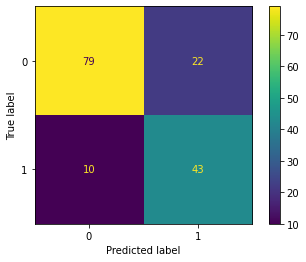

In [74]:
plot_confusion_matrix(model,X_test,y_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
report = classification_report(y_test, y_pred)
print("Classification report : \n", report)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       101
           1       0.66      0.81      0.73        53

    accuracy                           0.79       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.81      0.79      0.80       154



### AUC (ROC Curve)

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.841


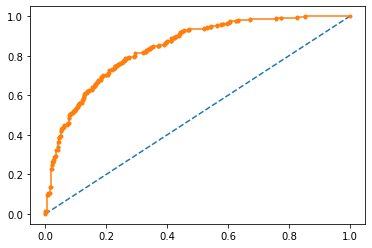

In [78]:
# predict probabilities
probs = model.predict_proba(X)
probs
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC for logistic Regression model
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

## Building Decision Tree Classification Model

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model_dt = DecisionTreeClassifier()

In [81]:
model_dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [82]:
y_pred_dt = model_dt.predict(X_test)

In [83]:
print(model_dt.score(X_train_res, y_train_res))

1.0


In [84]:
accuracy_score(y_test,y_pred_dt)

0.6558441558441559

In [85]:
confusion_matrix(y_test,y_pred_dt)

array([[66, 35],
       [18, 35]], dtype=int64)

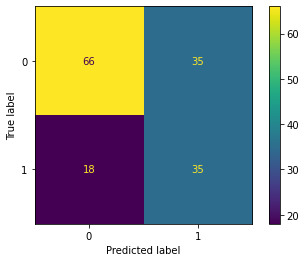

In [86]:
plot_confusion_matrix(model_dt, X_test,y_test)

In [87]:
report = classification_report(y_test, model_dt.predict(X_test))
print("Classification report : \n", report)

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.65      0.71       101
           1       0.50      0.66      0.57        53

    accuracy                           0.66       154
   macro avg       0.64      0.66      0.64       154
weighted avg       0.69      0.66      0.66       154



AUC: 0.931
True Positive Rate - [0.         0.93283582 1.        ], False Positive Rate - [0.   0.07 1.  ] Thresholds - [2. 1. 0.]


Text(0.5, 0, 'False Positive Rate')

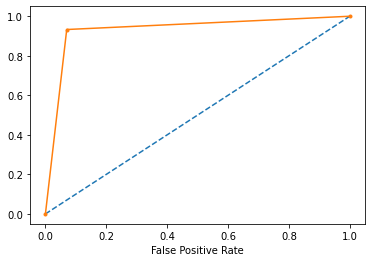

In [88]:
# predict probabilities
probs = model_dt.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model3 = RandomForestClassifier()
model3.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [91]:
y_pred_rf = model3.predict(X_test)

In [92]:
print(model3.score(X_train,y_train))

1.0


In [93]:
print("Accuracy score : ", accuracy_score(y_test,y_pred_rf))

Accuracy score :  0.7727272727272727


In [94]:
print("Confusion Matrix : \n", confusion_matrix(y_test,y_pred_rf))

Confusion Matrix : 
 [[74 27]
 [ 8 45]]


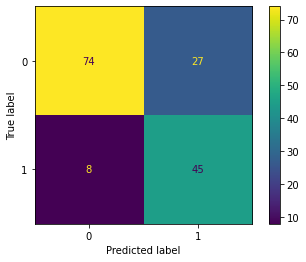

In [95]:
plot_confusion_matrix(model3, X_test,y_test)

In [96]:
report = classification_report(y_test, model3.predict(X_test))
print("Classification report : \n", report)

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81       101
           1       0.62      0.85      0.72        53

    accuracy                           0.77       154
   macro avg       0.76      0.79      0.76       154
weighted avg       0.81      0.77      0.78       154



AUC: 0.987
True Positive Rate - [0.         0.01492537 0.03358209 0.06716418 0.1119403  0.1641791
 0.2238806  0.28731343 0.34701493 0.37686567 0.39925373 0.42537313
 0.47761194 0.50373134 0.51492537 0.54477612 0.57835821 0.60447761
 0.61940299 0.65298507 0.66791045 0.69402985 0.74253731 0.76119403
 0.78731343 0.81716418 0.8358209  0.84328358 0.85820896 0.89552239
 0.91044776 0.92164179 0.92910448 0.93656716 0.94776119 0.95522388
 0.95522388 0.95895522 0.95895522 0.96268657 0.96641791 0.96641791
 0.97014925 0.97014925 0.97014925 0.9738806  0.9738806  0.97761194
 0.97761194 0.98134328 0.98134328 0.98507463 0.98507463 0.98507463
 0.98507463 0.98507463 0.98507463 0.98507463 0.99253731 0.99253731
 0.99253731 0.99626866 0.99626866 0.99626866 0.99626866 0.99626866
 0.99626866 0.99626866 0.99626866 0.99626866 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ], False Positive Rate - [0.    0.    0.    0.    0.    0.    0.    0.

Text(0.5, 0, 'False Positive Rate')

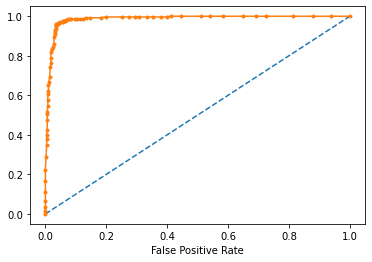

In [97]:
# predict probabilities
probs = model3.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")

## Building the Model using SVM

In [98]:
from sklearn.svm import SVC 
model4 = SVC(kernel='rbf',
           gamma='auto')
model4.fit(X_train,y_train)

SVC(gamma='auto')

In [99]:
y_pred_svm = model4.predict(X_test)

In [100]:
print("Accuracy Score : \n", accuracy_score(y_test,y_pred_svm))

Accuracy Score : 
 0.6558441558441559


In [101]:
report = classification_report(y_test, y_pred_svm)
print("Classification report : \n", report)

Classification report : 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       101
           1       0.00      0.00      0.00        53

    accuracy                           0.66       154
   macro avg       0.33      0.50      0.40       154
weighted avg       0.43      0.66      0.52       154



In [102]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=7)
model5.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=7)

In [103]:
y_pred_knn = model5.predict(X_test)

In [104]:
print("Accuracy Score : \n", accuracy_score(y_test,y_pred_knn))

Accuracy Score : 
 0.6818181818181818


In [105]:
report = classification_report(y_test, y_pred_knn)
print("Classification report : \n", report)

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.64      0.73       101
           1       0.53      0.75      0.62        53

    accuracy                           0.68       154
   macro avg       0.68      0.70      0.67       154
weighted avg       0.73      0.68      0.69       154



AUC: 0.857
True Positive Rate - [0.         0.24253731 0.48134328 0.67164179 0.80597015 0.92164179
 0.97014925 1.         1.        ], 
False Positive Rate - [0.    0.004 0.054 0.166 0.276 0.426 0.596 0.736 1.   ] 
Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0.5, 0, 'False Positive Rate')

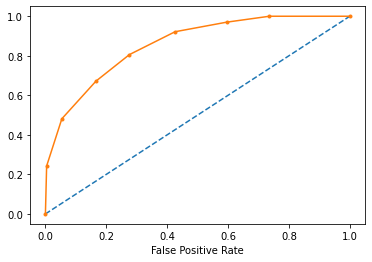

In [106]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model5.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, \nFalse Positive Rate - {} \nThresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")